In [1]:
#import basic libaries
import tensorflow as tf
import cv2 #to do some image operations (cv2=OpenCv)
import os #to iterate through directories and join paths
import numpy as np #to do various array of operations (numpy=numerical python)

#import plot to show the image
import matplotlib.pyplot as plt

#import image
from tensorflow.keras.preprocessing import image

#import image data generator untuk mengenerate label otomatis sesuai nama folder dmn image tsb berada
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#loading images
img = image.load_img("basedata/training/Nin/1.PNG")

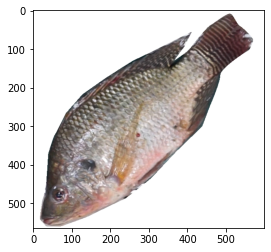

In [3]:
#showing the image
plt.imshow(img)

In [4]:
#showing the size of image
cv2.imread("basedata/training/Nin/1.PNG").shape #will be shown in high, width, channel

(564, 600, 3)

In [5]:
#showing the size of image
cv2.imread("basedata/training/Nin/1.PNG") #showing image in 3 dimentional matrics

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [6]:
#generating training and validation dataset dg ImageDataGenerator
#rescale=1/255 akan membuat image menjadi hitam putih. Karena image RGB bernilai 0-255. Dg membagi 255, maka nilainya akan menjadi 0 dan 1
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [7]:
#convert training images to fit for the neural network
train_dataset = train.flow_from_directory('basedata/training',
                                         target_size = (500,500),
                                         batch_size = 3,)
#flow from directory akan mengenerate label otomatis dari nama folder
#untuk memasukkan ke NN tidak bisa size yang bervariasi, jadi harus di resize
#karena jumlah image tidak banyak, maka batch size cukup di set 3
validation_dataset = train.flow_from_directory('basedata/validation',
                                         target_size = (500,500),
                                         batch_size = 3,)

Found 58 images belonging to 4 classes.
Found 25 images belonging to 4 classes.


In [8]:
#untuk mengetahui label kelas
train_dataset.class_indices

{'Nin': 0, 'Nuanchan': 1, 'Tapian': 2, 'Yeesok': 3}

In [9]:
#define the model
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (500,500,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                   ])
#layer pertama adalah Conv2D (konvolusi 2 dimensi) dg jumlah 16 dg size masing2 3x3.

In [10]:
#compiling model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
#fit up the model and start training
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs = 30,
                      validation_data = validation_dataset)

Epoch 1/30
3/3 [==============================] - 3s 923ms/step - loss: 20.0857 - accuracy: 0.5833 - val_loss: 10.2109 - val_accuracy: 0.7500
Epoch 2/30
3/3 [==============================] - 2s 829ms/step - loss: 6.6086 - accuracy: 0.5833 - val_loss: 0.7290 - val_accuracy: 0.2900
Epoch 3/30
3/3 [==============================] - 2s 818ms/step - loss: 0.6739 - accuracy: 0.5833 - val_loss: 0.5660 - val_accuracy: 0.7500
Epoch 4/30
3/3 [==============================] - 2s 794ms/step - loss: 0.5686 - accuracy: 0.7500 - val_loss: 0.5770 - val_accuracy: 0.7500
Epoch 5/30
3/3 [==============================] - 2s 824ms/step - loss: 0.5671 - accuracy: 0.7500 - val_loss: 0.5689 - val_accuracy: 0.7500
Epoch 6/30
3/3 [==============================] - 2s 841ms/step - loss: 0.5683 - accuracy: 0.7500 - val_loss: 0.5652 - val_accuracy: 0.7500
Epoch 7/30
3/3 [==============================] - 2s 824ms/step - loss: 0.5664 - accuracy: 0.7500 - val_loss: 0.5682 - val_accuracy: 0.7500
Epoch 8/30
3/3 [==

In [ ]:
#coding d atas adl membangun DL yg bekerja dlm internal representation
#can we interprate the internal representation?
#generally no, but if we work on images and conv neural net, we can interprete what NN has learned through internal representation

#coding di bawah ini akan menunjukkan apa yang telah d pelajari oleh CNN melalui layer Conv2D and MaxPool2D


In [12]:
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [13]:
# Get list of layers from model
layer_outputs = [layer.output for layer in model.layers[1:]]

#it means we will get the layer lis from the first ntill the last

In [14]:
# Create a visualization model
visualize_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

In [15]:
# Load image for prediction
img=load_img('basedata/training/Nin/1.PNG',target_size=(500,500))

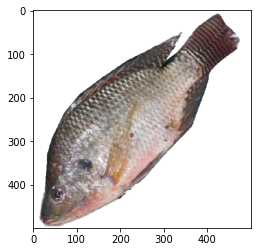

In [16]:
#showing the image
plt.imshow(img)

In [17]:
# Convert image to array
x = img_to_array(img)

In [18]:
# Print shape of array
x.shape

(500, 500, 3)

In [19]:
# Reshape image for passing it to prediction
x=x.reshape((1,500,500,3))
print(x.shape)

(1, 500, 500, 3)


In [20]:
# Rescale the image
x = x /255 

#di re-scale karena saat training juga di re-scale

In [21]:
# Get all layers feature maps for image
feature_maps=visualize_model.predict(x)
print(len(feature_maps))

1/1 [==============================] - 0s 113ms/step
8


In [22]:
# Show names of layers available in model
layer_names = [layer.name for layer in model.layers]
print(layer_names)

['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dense_1']


In [23]:
# import required libraries
%matplotlib inline

(1, 249, 249, 16)
(1, 247, 247, 32)
(1, 123, 123, 32)
(1, 121, 121, 64)
(1, 60, 60, 64)
(1, 230400)
(1, 512)
(1, 1)


C:\Users\EIEI\AppData\Local\Temp/ipykernel_9284/4258340940.py:11: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


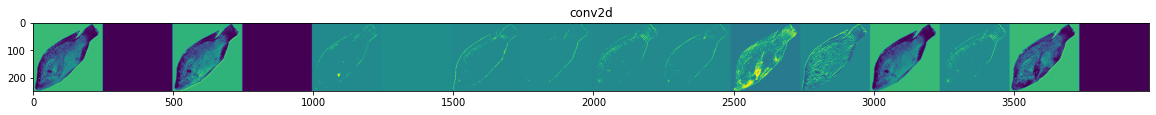

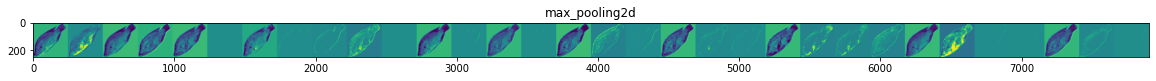

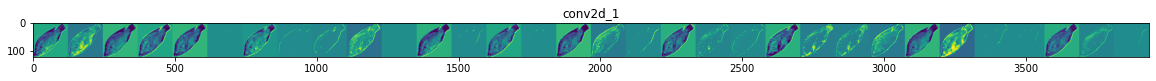

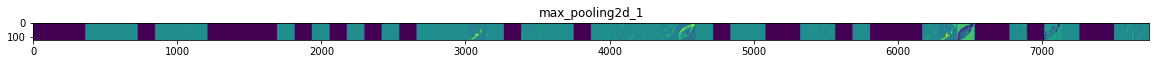

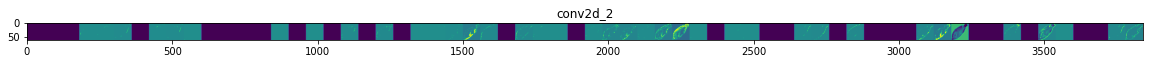

In [24]:
# Plotting the graph
for layer_names, feature_maps in zip(layer_names,feature_maps):
  print(feature_maps.shape)
  if len(feature_maps.shape) == 4 :
    channels = feature_maps.shape[-1]
    size = feature_maps.shape[1]
    display_grid = np.zeros((size, size * channels))
    for i in range(channels):
      x = feature_maps[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / channels
    plt.figure(figsize=(scale * channels, scale))
    plt.title(layer_names)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')